<a href="https://colab.research.google.com/github/amoghgopadi/Facial-Expression-Recognition/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


%matplotlib inline

In [ ]:
def restore_data(path):
    data = dict()
    if os.path.isfile(path):
        file = open(path, 'rb')
        data = pickle.load(file)
    return data

In [ ]:
print('Restore Training data from cache!')
cache_path = '/content/drive/MyDrive/FER/train.dat'
(x_train, y_train) = restore_data(cache_path)

x_train = np.array(x_train, dtype=object)
y_train = np.array(y_train, dtype=np.int64)
x_train = x_train.reshape(-1, 48, 48, 1)
y_train = np_utils.to_categorical(y_train)
x_train = x_train.astype('float32')
x_train /= 255
print('X shape:', x_train.shape)
print('Y shape:', y_train.shape)

Restore Training data from cache!
X shape: (47815, 48, 48, 1)
Y shape: (47815, 5)


In [ ]:
print('Restore Validation data from cache!')
cache_path = '/content/drive/MyDrive/FER/valid.dat'
(x_valid, y_valid) = restore_data(cache_path)

x_valid = np.array(x_valid, dtype=object)
y_valid = np.array(y_valid, dtype=np.int64)
x_valid = x_valid.reshape(-1, 48, 48, 1)
y_valid = np_utils.to_categorical(y_valid)
x_valid = x_valid.astype('float32')
x_valid /= 255
print('X shape:', x_valid.shape)
print('Y shape:', y_valid.shape)

Restore Validation data from cache!
X shape: (6157, 48, 48, 1)
Y shape: (6157, 5)


In [ ]:
print('Restore Testing data from cache!')
cache_path = '/content/drive/MyDrive/FER/test.dat'
(x_test, y_test) = restore_data(cache_path)

x_test = np.array(x_test, dtype=object)
y_test = np.array(y_test, dtype=np.int64)
x_test = x_test.reshape(-1, 48, 48, 1)
y_test = np_utils.to_categorical(y_test)
x_test = x_test.astype('float32')
x_test /= 255
print('X shape:', x_test.shape)
print('Y shape:', y_test.shape)

Restore Testing data from cache!
X shape: (6125, 48, 48, 1)
Y shape: (6125, 5)


In [ ]:
model = Sequential()

model.add(Conv2D(64, 3, data_format="channels_last", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(256, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_18 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_19 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
# save best weights
checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

# num epochs
epochs = 20

# run model
hist = model.fit(x_train, y_train, epochs=epochs,
                 shuffle=True,
                 batch_size=100, validation_data=(x_valid, y_valid),
                 callbacks=[checkpointer])

Epoch 1/20
479/479 [==============================] - 47s 94ms/step - loss: 1.4082 - accuracy: 0.3980 - val_loss: 1.1904 - val_accuracy: 0.4936

Epoch 00001: val_loss improved from inf to 1.19042, saving model to face_model.h5
Epoch 2/20
479/479 [==============================] - 45s 93ms/step - loss: 0.8112 - accuracy: 0.6547 - val_loss: 3.5383 - val_accuracy: 0.3286

Epoch 00002: val_loss did not improve from 1.19042
Epoch 3/20
479/479 [==============================] - 45s 94ms/step - loss: 0.6445 - accuracy: 0.7348 - val_loss: 0.8250 - val_accuracy: 0.6789

Epoch 00003: val_loss improved from 1.19042 to 0.82504, saving model to face_model.h5
Epoch 4/20
479/479 [==============================] - 45s 94ms/step - loss: 0.5550 - accuracy: 0.7726 - val_loss: 0.5880 - val_accuracy: 0.7648

Epoch 00004: val_loss improved from 0.82504 to 0.58795, saving model to face_model.h5
Epoch 5/20
479/479 [==============================] - 45s 94ms/step - loss: 0.4907 - accuracy: 0.8029 - val_loss: 0

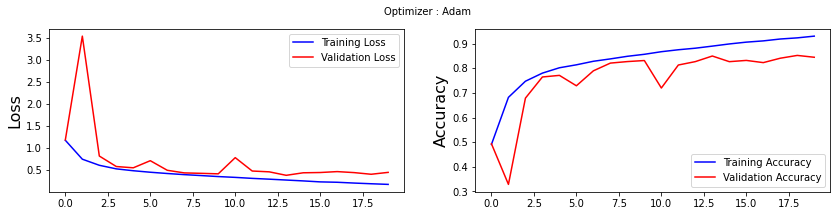

In [ ]:
#plot graphs
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.455324649810791, 0.8442448973655701]